In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
games = pd.read_csv('games.csv', low_memory=False)
game_details = pd.read_csv('games_details.csv', low_memory=False)
players = pd.read_csv('players.csv', low_memory=False)
ranking = pd.read_csv('ranking.csv', low_memory=False)
teams = pd.read_csv('teams.csv', low_memory=False)

In [3]:
games[['GAME_DATE_EST','GAME_ID']]

,GAME_DATE_EST,GAME_ID
0,2022-03-12,22101005
1,2022-03-12,22101006
2,2022-03-12,22101007
3,2022-03-12,22101008
4,2022-03-12,22101009
...,...,...
25791,2014-10-06,11400007
25792,2014-10-06,11400004
25793,2014-10-06,11400005
25794,2014-10-05,11400002


In [4]:
game_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


In [5]:
df = game_details.merge(games[['GAME_DATE_EST','GAME_ID']], how='left',on='GAME_ID')
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE_EST
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0,2022-03-12
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0,2022-03-12
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0,2022-03-12
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0,2022-03-12
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0,2022-03-12


In [6]:
kat_df = df[df['PLAYER_NAME'] == 'Karl-Anthony Towns']

In [7]:
kat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 2 to 536420
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            523 non-null    int64  
 1   TEAM_ID            523 non-null    int64  
 2   TEAM_ABBREVIATION  523 non-null    object 
 3   TEAM_CITY          523 non-null    object 
 4   PLAYER_ID          523 non-null    int64  
 5   PLAYER_NAME        523 non-null    object 
 6   NICKNAME           67 non-null     object 
 7   START_POSITION     509 non-null    object 
 8   COMMENT            14 non-null     object 
 9   MIN                509 non-null    object 
 10  FGM                509 non-null    float64
 11  FGA                509 non-null    float64
 12  FG_PCT             509 non-null    float64
 13  FG3M               509 non-null    float64
 14  FG3A               509 non-null    float64
 15  FG3_PCT            509 non-null    float64
 16  FTM                509 

## Simple Linear Regression

In [8]:
cols = ['MIN','PTS']
kat_df = kat_df[cols].reset_index(drop=True)

In [9]:
kat_df = kat_df.dropna()

In [57]:
kat_df

,MIN,PTS
0,25:17,15.0
1,33:52,21.0
2,29:14,13.0
3,24:03,27.0
4,34:24,36.0
...,...,...
518,22:44,8.0
519,19:49,12.0
520,22:59,7.0
521,23:01,13.0


In [11]:
kat_df_copy = kat_df.copy()
kat_df_copy['MIN'] = kat_df_copy['MIN'].astype('string')
#kat_df_copy['MIN'].head()
kat_df_copy['MIN'] = pd.to_timedelta(kat_df_copy['MIN'].apply(lambda x: f'00:{x}'))
kat_df_copy['MIN'] = kat_df_copy['MIN'].astype('string')

In [12]:
kat_df_copy['MIN'] = kat_df_copy['MIN'].str.slice(start=10)
kat_df_copy.head()

,MIN,PTS
0,25:17,15.0
1,33:52,21.0
2,29:14,13.0
3,24:03,27.0
4,34:24,36.0


In [54]:
bool_series = pd.isna(kat_df_copy['MIN'])
kat_df_copy[bool_series]

,MIN,PTS,seconds


In [50]:
from datetime import timedelta
def seconder(x):
    mins, secs = map(float, str(x).split(':'))
    td = timedelta(minutes=mins, seconds=secs)
    return td.total_seconds()

In [53]:
kat_df_copy['MIN'] = int(kat_df_copy['MIN'].apply(seconder) / 60).astype(int)

ValueError: not enough values to unpack (expected 2, got 1)

In [16]:
kat_df_copy['seconds'].dtype

dtype('float64')

In [17]:
kat_df_copy['MIN'] = (kat_df_copy['seconds'] / 60).astype(int)
kat_df_copy['PTS']= kat_df_copy['PTS'].astype(int) 
kat_df_copy.head()

,MIN,PTS,seconds
0,25,15,1517.0
1,33,21,2032.0
2,29,13,1754.0
3,24,27,1443.0
4,34,36,2064.0


In [18]:
kat = kat_df_copy.drop('seconds',axis=1)
kat.head()

,MIN,PTS
0,25,15
1,33,21
2,29,13
3,24,27
4,34,36


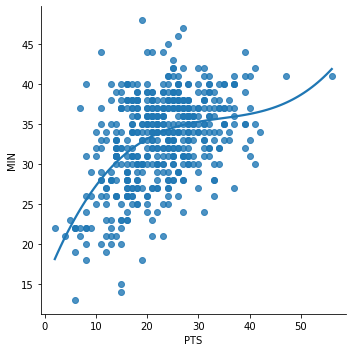

In [19]:
sns.lmplot(x='PTS',y='MIN',data=kat,order=3,ci=None)

In [20]:
X = np.array(kat['MIN']).reshape(-1,1)
y = np.array(kat['PTS']).reshape(-1,1)

0      15
1      21
2      13
3      27
4      36
       ..
518     8
519    12
520     7
521    13
522    18
Name: PTS, Length: 509, dtype: int32

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [22]:
regr=LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test,y_test))

0.19845291584029723
0.21124313954993612


In [23]:
y_pred = regr.predict(X_test)
print(y_pred)

[[24.82370969]
 [26.07036767]
 [25.44703868]
 [18.59041979]
 [25.44703868]
 [19.21374878]
 [23.57705171]
 [24.2003807 ]
 [18.59041979]
 [22.33039373]
 [15.47377484]
 [26.07036767]
 [17.9670908 ]
 [21.08373575]
 [21.08373575]
 [22.95372272]
 [26.69369666]
 [25.44703868]
 [24.82370969]
 [20.46040676]
 [14.85044585]
 [22.33039373]
 [26.69369666]
 [20.46040676]
 [10.48714292]
 [16.09710383]
 [21.70706474]
 [25.44703868]
 [26.07036767]
 [18.59041979]
 [26.07036767]
 [16.09710383]
 [18.59041979]
 [19.83707777]
 [14.22711686]
 [17.9670908 ]
 [24.82370969]
 [22.95372272]
 [26.69369666]
 [18.59041979]
 [17.9670908 ]
 [18.59041979]
 [24.82370969]
 [19.21374878]
 [27.31702565]
 [24.82370969]
 [24.2003807 ]
 [17.9670908 ]
 [20.46040676]
 [22.95372272]
 [16.09710383]
 [23.57705171]
 [17.34376181]
 [22.95372272]
 [26.69369666]
 [19.83707777]
 [24.82370969]
 [24.82370969]
 [24.2003807 ]
 [21.70706474]
 [24.82370969]
 [24.2003807 ]
 [22.95372272]
 [26.69369666]
 [24.82370969]
 [20.46040676]
 [23.57705

In [26]:
r2_score(y_test, y_pred)

0.21124313954993612

### Improve the model

In [27]:
#standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))

0.19845291584029723


In [29]:
y_hat = regr.predict(X_test)
print(r2_score(y_test, y_hat), mean_absolute_error(y_test, y_hat),np.sqrt(mean_squared_error(y_test, y_hat)))

0.21666159010562736 5.5417438473832945 6.942400235127173


### Add new features

In [48]:
new_df = df[df['PLAYER_NAME'] == 'Karl-Anthony Towns']
new_df = new_df[['MIN', 'FG_PCT', 'FG3_PCT', 'FT_PCT','OREB', 'AST', 'STL', 'TO', 'PF', 'PTS','PLUS_MINUS']]
new_df['MIN'] = new_df['MIN'].astype('string')
new_df.reset_index(drop=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 2 to 536420
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MIN         509 non-null    string 
 1   FG_PCT      509 non-null    float64
 2   FG3_PCT     509 non-null    float64
 3   FT_PCT      509 non-null    float64
 4   OREB        509 non-null    float64
 5   AST         509 non-null    float64
 6   STL         509 non-null    float64
 7   TO          509 non-null    float64
 8   PF          509 non-null    float64
 9   PTS         509 non-null    float64
 10  PLUS_MINUS  509 non-null    float64
dtypes: float64(10), string(1)
memory usage: 49.0 KB


In [31]:
bool_series = pd.isna(new_df['MIN'])
new_df[bool_series]

,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,AST,STL,TO,PF,PTS,PLUS_MINUS
16914,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68548,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68804,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69315,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69687,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69799,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70151,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71484,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71896,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82347,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
new_df = new_df.dropna()
new_df[bool_series]

C:\Users\jtownsend\AppData\Local\Temp\ipykernel_13768\3435313034.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[bool_series]


,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,AST,STL,TO,PF,PTS,PLUS_MINUS


In [33]:
new_df['MIN'] = new_df['MIN'].astype('string')
new_df['MIN'] = (new_df['MIN'].apply(seconder) / 60).astype(int)
new_df.head()

,MIN,FG_PCT,FG3_PCT,FT_PCT,OREB,AST,STL,TO,PF,PTS,PLUS_MINUS
2,25,0.444,0.333,0.750,1.0,0.0,0.0,3.0,4.0,15.0,14.0
168,33,0.429,0.200,1.000,2.0,4.0,2.0,3.0,5.0,21.0,2.0
605,29,0.800,0.000,0.833,2.0,4.0,0.0,5.0,2.0,13.0,20.0
994,24,0.571,1.000,0.667,7.0,1.0,1.0,2.0,2.0,27.0,34.0
1421,34,0.765,0.000,0.909,1.0,5.0,0.0,0.0,2.0,36.0,14.0


In [34]:
X = new_df[['MIN','FG_PCT','FG3_PCT','FT_PCT','OREB','AST','STL','TO','PF','PLUS_MINUS']]
y = new_df.PTS

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [36]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
len(y_train)

407

In [38]:
regr.fit(X_train, y_train)
ypred = regr.predict(X_test)
print(r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred)))

0.5010542984843867 4.449421620400455 5.4611173868486755


In [39]:
y_test.shape

(102,)

## Improve with binary search

In [43]:
X = new_df[['MIN','FG_PCT','FG3_PCT','FT_PCT','OREB','AST','STL','TO','PF','PLUS_MINUS']]
y = new_df.PTS
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)

In [45]:
print(r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat)))

-0.10744591041752094 6.235294117647059 8.13609724815114


In [46]:
# adjust max leaf nodes
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    dt = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
    dt.fit(X_train, y_train)
    yhat = dt.predict(X_test)
    r2 = r2_score(y_test, yhat)
    mae = mean_absolute_error(y_test, yhat)
    me = np.sqrt(mean_squared_error(y_test, yhat))
    return(r2, mae, me)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_r2, my_mae, my_me = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t r2:  %d" %(max_leaf_nodes, my_r2),
          "Max leaf nodes: %d  \t\t MAE:  %d" %(max_leaf_nodes, my_mae), 
          "Max leaf nodes: %d  \t\t ME:  %d" %(max_leaf_nodes, my_me))

Max leaf nodes: 5  		 r2:  0 Max leaf nodes: 5  		 MAE:  5 Max leaf nodes: 5  		 ME:  6
Max leaf nodes: 50  		 r2:  0 Max leaf nodes: 50  		 MAE:  6 Max leaf nodes: 50  		 ME:  7
Max leaf nodes: 500  		 r2:  0 Max leaf nodes: 500  		 MAE:  6 Max leaf nodes: 500  		 ME:  7
Max leaf nodes: 5000  		 r2:  0 Max leaf nodes: 5000  		 MAE:  6 Max leaf nodes: 5000  		 ME:  8
